In [63]:
!pip install category_encoders==2.6.0
!pip install pandoc
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 12.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 31.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425347 sha256=77368b1ab52fd83e330fe9e540a2896839b9afe9f2f194e38b893d36f812a777
  Stored in directory: /Users/aishwaryaadiki/Library/Caches/pip/wheels/38/df/61/8c121f50c3cffd77f8178180dd232d90b3b99d1bd61fb6d6be
Successfully built pyspark


### Below simulation and graphs are provided to demonstrate difference between different scalers

- Robust scaler - provides better encoding for distributions with outliers
- Standard scaler - provides scaling for distributions close to normal
- Min-Max scaler - general scaler but with weak point in regard to outliers


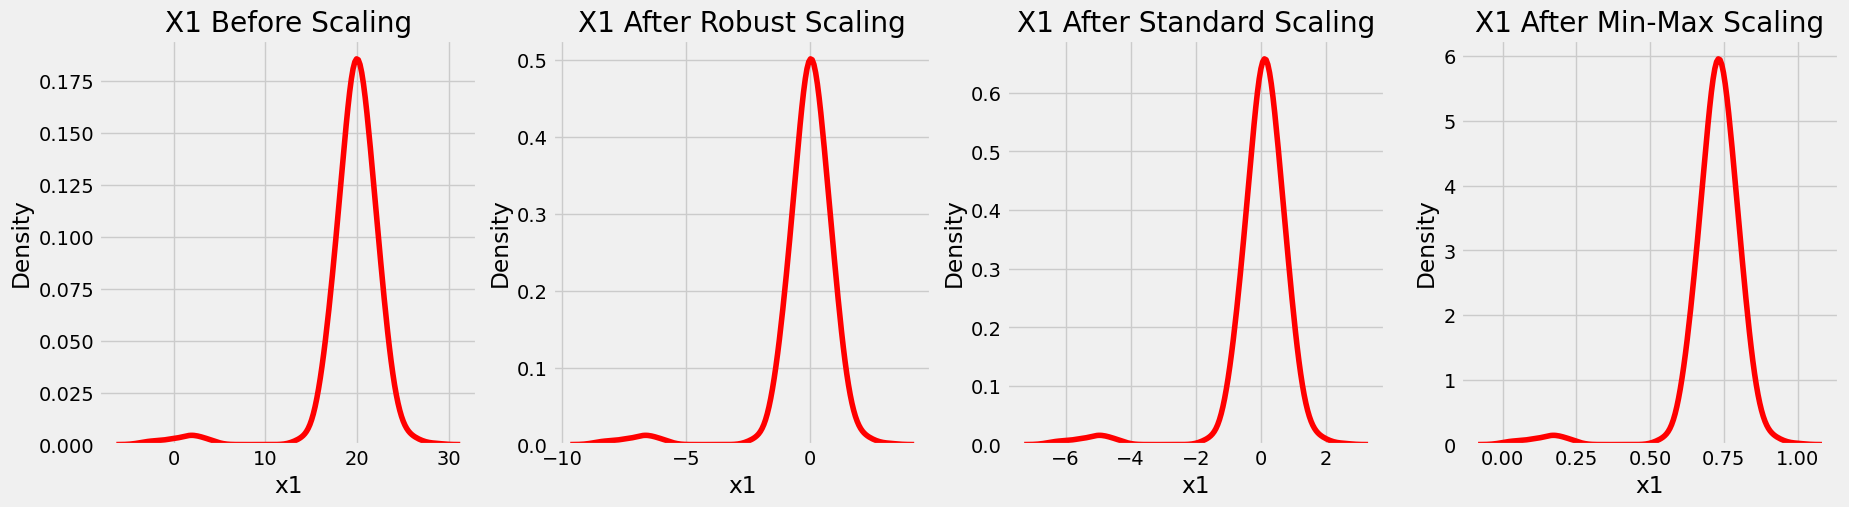

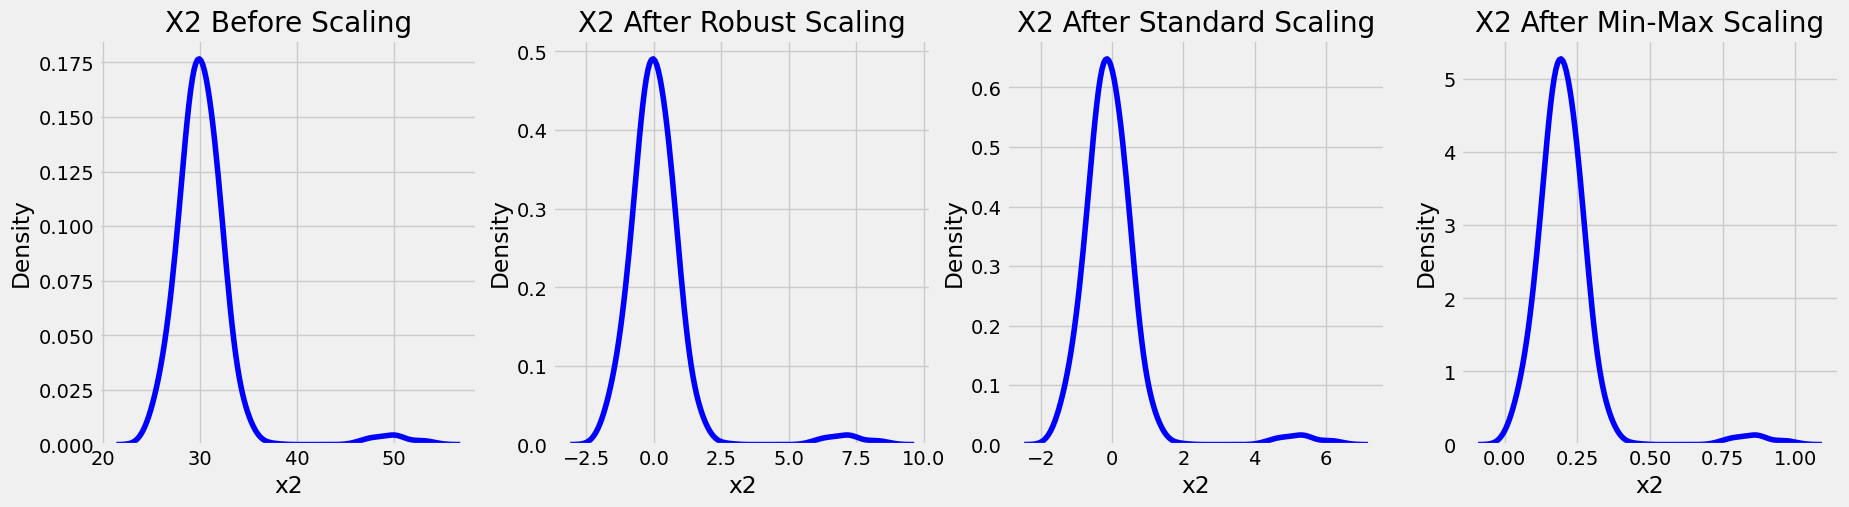

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X1 Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')

ax2.set_title('X1 After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r')

ax3.set_title('X1 After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r')

ax4.set_title('X1 After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X2 Before Scaling')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('X2 After Robust Scaling')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b')

ax3.set_title('X2 After Standard Scaling')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b')
ax4.set_title('X2 After Min-Max Scaling')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b')
plt.show()

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
"""
Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [89]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('/Users/aishwaryaadiki/Downloads/Car_Prices_Poland_train.csv')
X_test  = pd.read_csv('/Users/aishwaryaadiki/Downloads/Car_Prices_Poland_test.csv')

In [90]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88445, 10)
Test shape: (29482, 10)


In [91]:
X_train.isna().sum()

mark                   0
model                  0
generation_name    22551
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [92]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500


In [93]:
X_train.describe()

,year,mileage,vol_engine,price
count,88445.000000,8.844500e+04,88445.000000,8.844500e+04
mean,2012.933428,1.408320e+05,1812.341907,7.034750e+04
std,5.684016,9.251080e+04,646.731501,8.527590e+04
min,1964.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.463000e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.390000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [94]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 9042, 'opel': 8898, 'bmw': 8306, 'vol..."
1,model,328,object,1,16,"{'astra': 2479, 'seria-3': 2228, 'a4': 2181, '..."
2,generation_name,364,object,3,30,"{'gen-8p-2003-2012': 1179, 'gen-j-2009-2015': ..."
3,year,51,int64,4,4,"{2021: 7963, 2017: 6672, 2018: 6482, 2016: 529..."
4,mileage,27980,int64,1,7,"{1: 2809, 5: 2416, 10: 1089, 180000: 541, 2200..."
5,vol_engine,465,int64,1,4,"{1598: 7636, 1968: 6101, 1995: 4868, 1997: 400..."
6,fuel,6,object,3,8,"{'Gasoline': 46298, 'Diesel': 36212, 'LPG': 31..."
7,city,3951,object,2,24,"{'Warszawa': 5980, 'Łódź': 2498, 'Kraków': 225..."
8,province,23,object,1,24,"{'Mazowieckie': 16685, 'Śląskie': 12517, 'Wiel..."
9,price,8025,int64,3,7,"{19900: 1009, 39900: 858, 29900: 853, 18900: 8..."


Explore valid values and counts for the variable `mark` 

In [95]:
desc_df.iloc[0]["Level_Values"]

{'audi': 9042,
 'opel': 8898,
 'bmw': 8306,
 'volkswagen': 8072,
 'ford': 7216,
 'mercedes-benz': 5325,
 'renault': 5202,
 'skoda': 4412,
 'toyota': 3878,
 'peugeot': 3848,
 'volvo': 3299,
 'hyundai': 3042,
 'kia': 2828,
 'nissan': 2332,
 'mazda': 2157,
 'fiat': 2150,
 'seat': 2132,
 'citroen': 2031,
 'honda': 1620,
 'mitsubishi': 851,
 'mini': 810,
 'alfa-romeo': 535,
 'chevrolet': 459}

### **Replacing missing values for all columns for both X_train and X_test. Replacing Na's with zero for numerical variables and with "Missing" for categorical**

In [141]:
import pandas as pd

categorical_columns=X_train.select_dtypes(include=['object']).columns
X_train[categorical_columns]=X_train[categorical_columns].fillna('Missing')
X_test[categorical_columns]=X_test[categorical_columns].fillna('Missing')

X_train=X_train.fillna(0)
X_test=X_test.fillna(0)


### **For the categorical variables:** 
- Used LabelEncoder to encode if number of levels is more than 24 (including)
- Used one-hot-encoding to encode if number of levels is less than or equal to 23. You can use Pandas or `sklearn` approach
- made sure encoder is created from X_train only
- X_test will be encoded from the corresponding encoder above
- Gave new columns names "Original-name"_le or "Original-name"_cat_name. Where "cat_name" is valid value present in categorical feature. For example, if column "A" contains values "a, b,c" new column names will be "A_a", "A_b" and "A_c"

```
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
```        

**Target encoding doesn't work well with Linear models**

In [98]:
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  365  values
Column  fuel  has  6  values
Column  city  has  3951  values
Column  province  has  23  values


In [99]:
import pandas as pd
from pyspark import pandas as ps
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['model', 'generation_name', 'city']
ohe_columns = ['mark', 'fuel', 'province']
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

# Defining Label Encoder
label_encoder = MultiColumnLabelEncoder(columns = categorical_columns)

# Fitting  Label encoder on train data
Fitted_le = label_encoder.fit(X_train[categorical_columns])

# Transforming Train/test datasets separately
X_train_le = Fitted_le.transform(X_train[categorical_columns])
X_test_le = Fitted_le.transform(X_test[categorical_columns])


X_train_le.columns = [str(col) + '_le' for col in X_train_le.columns]
X_test_le.columns = [str(col) + '_le' for col in X_test_le.columns]

# Defining One-Hot Encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fitting One-Hot Encoder on train data
encoder = enc.fit(X_train[ohe_columns])

# Transforming Train/test datasets separately
X_train_ohe = encoder.transform(X_train[ohe_columns]).toarray()
X_test_ohe = encoder.transform(X_test[ohe_columns]).toarray()

X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test.index)

X_train_ohe.columns = [str(col) + '_ohe' for col in X_train_ohe.columns]
X_test_ohe.columns = [str(col) + '_ohe' for col in X_test_ohe.columns]

FinalXtrain = pd.concat([ X_train_le, X_train_ohe, X_train ], axis=1)
FinalXtest = pd.concat([ X_test_le, X_test_ohe, X_test], axis=1)

print("\nEncoded Train: \n")
display(FinalXtrain) 

print("\n\nEncoded Test: \n")
display(FinalXtest)
#display(X_train_le.shape)


Encoded Train: 



,model_le,generation_name_le,city_le,0_ohe,1_ohe,2_ohe,3_ohe,4_ohe,5_ohe,6_ohe,7_ohe,8_ohe,9_ohe,10_ohe,11_ohe,12_ohe,13_ohe,14_ohe,15_ohe,16_ohe,17_ohe,18_ohe,19_ohe,20_ohe,21_ohe,22_ohe,23_ohe,24_ohe,25_ohe,26_ohe,27_ohe,28_ohe,29_ohe,30_ohe,31_ohe,32_ohe,33_ohe,34_ohe,35_ohe,36_ohe,37_ohe,38_ohe,39_ohe,40_ohe,41_ohe,42_ohe,43_ohe,44_ohe,45_ohe,46_ohe,47_ohe,48_ohe,49_ohe,50_ohe,51_ohe,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,159,11,546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,123,164,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,159,11,2689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,26,31,110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,67,193,659,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88440,171,0,3836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,skoda,kodiaq,Missing,2018,79667,1395,Gasoline,Łódź,Łódzkie,134900
88441,15,138,391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,peugeot,5008,gen-i-2009-2017,2009,201365,1600,Gasoline,Chmielnik,Świętokrzyskie,22900
88442,200,122,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nissan,note,gen-i-2005-2013,2007,123501,1386,Gasoline,Bielany Wrocławskie,Dolnośląskie,15500
88443,47,98,1218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,opel,astra,gen-h-2004-2013,2005,250000,1686,Diesel,Katowice,Śląskie,5800




Encoded Test: 



,model_le,generation_name_le,city_le,0_ohe,1_ohe,2_ohe,3_ohe,4_ohe,5_ohe,6_ohe,7_ohe,8_ohe,9_ohe,10_ohe,11_ohe,12_ohe,13_ohe,14_ohe,15_ohe,16_ohe,17_ohe,18_ohe,19_ohe,20_ohe,21_ohe,22_ohe,23_ohe,24_ohe,25_ohe,26_ohe,27_ohe,28_ohe,29_ohe,30_ohe,31_ohe,32_ohe,33_ohe,34_ohe,35_ohe,36_ohe,37_ohe,38_ohe,39_ohe,40_ohe,41_ohe,42_ohe,43_ohe,44_ohe,45_ohe,46_ohe,47_ohe,48_ohe,49_ohe,50_ohe,51_ohe,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,201,238,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,skoda,octavia,gen-iii-2013,2016,63000,1598,Diesel,Szamotuły,Wielkopolskie,49500
1,196,0,2350,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ford,mustang,Missing,1967,1,6384,Gasoline,Łódź,Łódzkie,379900
2,90,0,1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,mini,cooper,Missing,2016,125600,1998,Gasoline,Poznań,Wielkopolskie,99800
3,247,237,1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hyundai,santa-fe,gen-iii-2012-santa-fe,2014,270000,2199,Diesel,Radziejów,Kujawsko-pomorskie,59900
4,84,312,949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,renault,clio,gen-v-2019,2019,24000,999,Gasoline,Leszno,Wielkopolskie,56999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,193,291,2063,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ford,mondeo,gen-mk5-2014,2018,115000,1500,Gasoline,Warszawa,Mazowieckie,64900
29478,201,102,453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,skoda,octavia,gen-i-1996-2011,2002,189912,1595,Gasoline,Gdańsk,Pomorskie,6999
29479,109,349,1857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mercedes-benz,e-klasa,gen-w213-2016,2020,25800,1950,Diesel,Straszyn,Pomorskie,259900
29480,201,238,1216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,skoda,octavia,gen-iii-2013,2018,127695,1598,Diesel,Novy Jicin,Moravian-Silesian Region,71667


## Used **Standard** scaler to encode numerical variables. 

In [121]:
num_cols = X_train.select_dtypes(include = np.number).columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
numerical_variables=['year','mileage','vol_engine']

StandardScaler = scaler.fit(X_train[numerical_variables])

X_train_sca=StandardScaler.transform(X_train[numerical_variables])
X_test_sca=StandardScaler.transform(X_test[numerical_variables])

X_train_sca = pd.DataFrame(X_train_sca, index=X_train.index)
X_test_sca = pd.DataFrame(X_test_sca, index=X_test.index)

X_train_sca=X_train_sca.rename(columns={0: "year", 1: "mileage", 2: "vol_engine"})
X_test_sca=X_test_sca.rename(columns={0: "year", 1: "mileage", 2: "vol_engine"})

display(X_train_sca)
display(X_test_sca)



,year,mileage,vol_engine
0,-0.692019,-0.375169,-0.025269
1,-0.516087,0.715250,-0.946831
2,0.011712,0.585535,0.222131
3,-0.164221,1.504352,0.240686
4,0.187645,-0.201405,-0.390183
...,...,...,...
88440,0.891377,-0.661170,-0.645313
88441,-0.692019,0.654338,-0.328333
88442,-1.043885,-0.187342,-0.659229
88443,-1.395751,1.180063,-0.195356


,year,mileage,vol_engine
0,0.539511,-0.841334,-0.331425
1,-8.081203,-1.522328,7.068906
2,0.539511,-0.164652,0.287073
3,0.187645,1.396255,0.597868
4,1.067310,-1.262909,-1.257626
...,...,...,...
29477,0.891377,-0.279234,-0.482957
29478,-1.923550,0.530535,-0.336064
29479,1.243243,-1.243451,0.212853
29480,0.891377,-0.142006,-0.331425


## Trained `LinearRegression` on the Train dataset to predict `price`. 

Scored Test dataset. Reported performance metrics for both, Train and Test datasets.
Reported the following metrics:
- R-square
- Mean absolute error

In [132]:
y_train=X_train["price"]
y_test=X_test["price"]
                                                                 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X_train_sc = X_train_sca
X_test_sc= X_test_sca


lreg = LinearRegression()
lreg.fit(X_train_sc, y_train)

# evaluate on train set

y_pred_train=lreg.predict(X_train_sc)
r2_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)

# evaluate on test set
y_pred_test=lreg.predict(X_test_sc)
r2_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)

# print the results

print("Train R-squared:",round(r2_train,5))
print("Train MAE:",round(mae_train,5))
print("Test R-squared:",round(r2_test,5))
print("Test MAE:",round(mae_test,5))

Train R-squared: 0.55711
Train MAE: 33146.47391
Test R-squared: 0.572
Test MAE: 32903.65304


## Trained `RidgeRegression` on the Train dataset. Used `alpha=.2`. Scored Test dataset. Reported performance metrics for for both, Train and Test datasets. Reported the following metrics:
- R-square
- Mean absolute error


In [133]:
from sklearn.linear_model import Ridge

ridge=Ridge(0.2)

ridge.fit(X_train_sc,y_train)
y_pred_train=ridge.predict(X_train_sc)
r2_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)

y_pred_test=ridge.predict(X_test_sc)
r2_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)

# print the results
print("Train R-squared:",round(r2_train,5))
print("Train MAE:",round(mae_train,5))
print("Test R-squared:",round(r2_test,5))
print("Test MAE:",round(mae_test,5))

Train R-squared: 0.55711
Train MAE: 33146.4465
Test R-squared: 0.572
Test MAE: 32903.627


## Trained `LassoRegression` on the Train dataset. Used `alpha=.2`. Scored Test dataset. Reported performance metrics for both, Train and Test datasets. Reported following metrics:
- R-square
- Mean absolute error


In [134]:
from sklearn.linear_model import Lasso

lasso=Lasso(0.2)
lasso.fit(X_train_sc,y_train)
y_pred_train=lasso.predict(X_train_sc)
r2_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)

y_pred_test=lasso.predict(X_test_sc)
r2_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)

# print the results
print("Train R-squared:",round(r2_train,5))
print("Train MAE:",round(mae_train,5))
print("Test R-squared:",round(r2_test,5))
print("Test MAE:",round(mae_test,5))

Train R-squared: 0.55711
Train MAE: 33146.45193
Test R-squared: 0.572
Test MAE: 32903.63307


## **Calculated scaled and unscaled coeficients and intercept for the Lasso regression model.**

In [135]:
print("Scaled coefficients:", lasso.coef_)
print("Scaled intercept:", lasso.intercept_)

Scaled coefficients: [ 37652.41257664 -25919.27181684  37057.07953943]
Scaled intercept: 70347.49990389471


- **The intercept value is positive. Based on the output of coefficients and intercept, we can explain that year, mileage, engine volumne, model, generation_name and city name play a key role in deciding the value of a car. A car built in recent years, low mileage, bigger engine and higher model trim can have a higher value.**

- **Scaled data coefficients are better.**
      
- **The most important variable is 'year' because it has highest coefficient value. This suggests that carbuild in recent year can boost up the price value.**
      
- **The least important variable seems to be 'city' which suggests that city doesn't really play big role in deciding the price.**